<a href="https://colab.research.google.com/github/tashfeenMustafa/PCA-LFW-Dataset/blob/main/DataMining_Assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training

## Loading LFW dataset folder from Google Drive and converting images to (N^2) by 1 vectors in a training data matrix

Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load training set image file data. Then, load all relevant training set images by going to each folder in the training set folders and convert them to numpy arrays

In [ ]:
import os
import numpy as np
import PIL
from PIL import Image
path = '/content/drive/MyDrive/lfw_dataset/lfw/'

training_text_file_path = '/content/drive/MyDrive/lfw_dataset/peopleDevTrain.txt'

# list of tuples [(folder_name), (img_number)]
training_set_vectors = []
training_set_labels = []

length = None
height = None 
depth = None

# load training set text file
with open(training_text_file_path, "r") as training_text_file:
  for line in training_text_file:
    line = line.strip()
    split_line = line.split('\t')
    
    # get folder name and image number for the training set
    folder = split_line[0]
    img_number = int(split_line[-1])

    # add label to training labels
    training_set_labels.append(folder)

    # go to each folder from above and get the desired image
    os.chdir(path + folder)
    images = os.listdir(".")
    test_img = images[img_number - 1]
    
    # convert image to numpy array
    test_img_vector = np.asarray(Image.open(test_img))

    # get shape of test_img_vector
    length, height, depth = test_img_vector.shape

    # reshape training set vectors
    test_img_vector = test_img_vector.reshape((length * height * depth))
    training_set_vectors.append(test_img_vector)


In [ ]:
training_set_vectors = np.array(training_set_vectors)
print(training_set_vectors.shape)

(4038, 187500)


In [ ]:
for vector in training_set_vectors:
  vector = vector / 255

AJ_Cook


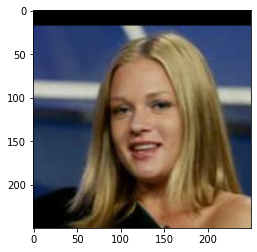

In [ ]:
tsv_1 = training_set_vectors[0].reshape((height, length, depth))
plt.imshow(tsv_1, cmap=plt.cm.bone)
print(training_set_labels[0])

In [ ]:
training_set_labels

## Working with the training set data matrix

Find average of all face vectors in training set vectors

In [ ]:
avg_of_training_set_vectors = np.mean(training_set_vectors, axis=0)
print(avg_of_training_set_vectors.shape)

(187500,)


In [ ]:
avg_of_training_set_vectors

array([56.69836553, 53.1584943 , 48.75136206, ..., 84.26844973,
       76.46087172, 73.3781575 ])

Showing the average face

In [ ]:
import PIL
from google.colab.patches import cv2_imshow

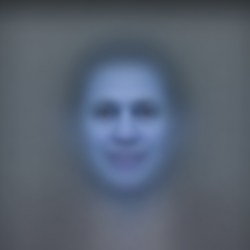

In [ ]:
average_face = avg_of_training_set_vectors.reshape((height, length, depth))
cv2_imshow(average_face)

Find the normalized vector

In [ ]:
demean_training_set_vectors = np.subtract(training_set_vectors, avg_of_training_set_vectors)

In [ ]:
print(demean_training_set_vectors.shape)
print(demean_training_set_vectors)

(4038, 187500)
[[-56.69836553 -53.1584943  -48.75136206 ... 117.73155027  93.53912828
   55.6218425 ]
 [-56.69836553 -53.1584943  -48.75136206 ...  66.73155027  85.53912828
  108.6218425 ]
 [197.30163447 198.8415057  204.24863794 ...  96.73155027  92.53912828
   97.6218425 ]
 ...
 [103.30163447 118.8415057  111.24863794 ... -83.26844973 -75.46087172
  -60.3781575 ]
 [-33.69836553 -46.1584943  -41.75136206 ... -10.26844973   1.53912828
    3.6218425 ]
 [-56.69836553 -53.1584943  -48.75136206 ... -66.26844973 -58.46087172
  -47.3781575 ]]


Show normalized vectors

In [ ]:
from matplotlib import pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


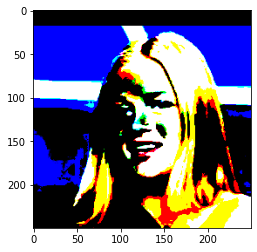

In [ ]:
dm_1 = demean_training_set_vectors[0].reshape((height, length, depth))
plt.imshow(dm_1, cmap=plt.cm.bone)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


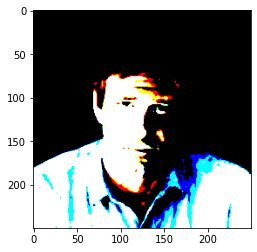

In [ ]:
dm_2 = demean_training_set_vectors[1].reshape((height, length, depth))
plt.imshow(dm_2, cmap=plt.cm.bone)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


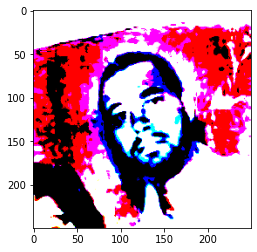

In [ ]:
dm_3 = demean_training_set_vectors[2].reshape((height, length, depth))
plt.imshow(dm_3, cmap=plt.cm.bone)

Calculate Covariance Matrix using A^T.A

In [ ]:
print(np.transpose(demean_training_set_vectors).shape)

(187500, 4038)


In [ ]:
covariance_matrix = np.dot(demean_training_set_vectors, demean_training_set_vectors.T)

In [ ]:
print(covariance_matrix.shape)
print(covariance_matrix[0].shape)

(4038, 4038)
(4038,)


## Getting Eigenvectors and Eigenvalues of Covariance Matrix

In [ ]:
import scipy.linalg as la

eigenvalues, eigenvectors = la.eig(covariance_matrix)

In [ ]:
idx = np.argsort(eigenvalues)

In [ ]:
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

In [ ]:
print(eigenvalues.shape)
print(eigenvectors.shape)

(4038,)
(4038, 4038)


In [ ]:
k = 12

eigenvalues = eigenvalues[:k]
print(eigenvalues)

[-3.28317597e-06+0.j -1.88063544e-07+0.j  2.13862466e+06+0.j
  3.10178305e+06+0.j  3.24988858e+06+0.j  3.34157327e+06+0.j
  3.45230666e+06+0.j  3.50473276e+06+0.j  3.53484799e+06+0.j
  3.57898825e+06+0.j  3.59086507e+06+0.j  3.64683154e+06+0.j]


In [ ]:
eigenvectors = eigenvectors[:k]
print(eigenvectors)

[[ 0.01572239 -0.00056757 -0.01564168 ... -0.01428713 -0.0045008
   0.00725845]
 [ 0.01572239 -0.00056757  0.02215819 ...  0.00805269  0.02541918
   0.02253909]
 [ 0.01572239 -0.00056757  0.01043491 ...  0.03166474  0.00447891
  -0.00969874]
 ...
 [ 0.01572239 -0.00056757  0.00013266 ...  0.03263819  0.0090097
  -0.01584401]
 [ 0.01572239 -0.00056757  0.00367579 ...  0.01793964 -0.02314856
  -0.01242842]
 [ 0.01572239 -0.00056757  0.00195498 ... -0.0244977   0.02527068
  -0.01389485]]


In [ ]:
print(eigenvalues.shape)
print(eigenvectors.shape)

(12,)
(12, 4038)


## Getting the Eigenfaces

In [ ]:
u = []

for eigvec_index, eigenvec in enumerate(eigenvectors):
  temp = np.dot(demean_training_set_vectors.T, eigenvec) / eigenvalues[eigvec_index]
  u.append(temp)


In [ ]:
u = np.array(u)
print(u.shape)
print(u[0].shape)
print(type(u))

(12, 187500)
(187500,)
<class 'numpy.ndarray'>


## Representing each training set image vector in the linear combinations of K eigenvectors.

In [ ]:
training_faces = [] 

for vector in demean_training_set_vectors:
  temp = np.dot(u, vector)
  training_faces.append(temp)

In [ ]:
training_faces = np.array(training_faces)

In [ ]:
training_faces.shape

(4038, 12)

# Testing

## Loading images from LFW dataset for Testing. Converting images to (N^2) by 1 vectors in a testing data matrix

Load testing set image file data. Then, load all relevant testing set images by going to each folder in the training set folders and convert them to numpy arrays

In [ ]:
path = '/content/drive/MyDrive/lfw_dataset/lfw/'

testing_text_file_path = '/content/drive/MyDrive/lfw_dataset/peopleDevTest.txt'

# list of tuples [(folder_name), (img_number)]
testing_set_vectors = []
testing_set_labels = []

length = None
height = None 
depth = None

# load training set text file
with open(testing_text_file_path, "r") as testing_text_file:
  for line in testing_text_file:
    line = line.strip()
    split_line = line.split('\t')
    
    # get folder name and image number for the training set
    folder = split_line[0]
    img_number = int(split_line[-1])

    # add label
    testing_set_labels.append(folder)
    
    # go to each folder from above and get the desired image
    os.chdir(path + folder)
    images = os.listdir(".")
    test_img = images[img_number - 1]
    
    # convert image to numpy array
    test_img_vector = np.asarray(Image.open(test_img))

    # get shape of test_img_vector
    length, height, depth = test_img_vector.shape

    # reshape training set vectors
    test_img_vector = test_img_vector.reshape((length * height * depth))
    testing_set_vectors.append(test_img_vector)

In [ ]:
testing_set_vectors = np.array(testing_set_vectors)
print(testing_set_vectors.shape)

(1711, 187500)


AJ_Lamas


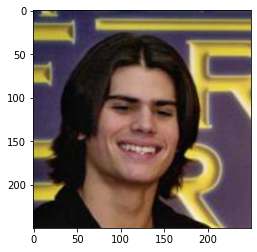

In [ ]:
testsv_1 = testing_set_vectors[0].reshape((height, length, depth))
plt.imshow(testsv_1, cmap=plt.cm.bone)
print(testing_set_labels[0])

## Working with testing set data matrix

Find the normalized vector of testing set data by subtracting testing set vectors from average of training set vectors

In [ ]:
demean_testing_set_vectors = np.subtract(testing_set_vectors, avg_of_training_set_vectors)

In [ ]:
print(demean_testing_set_vectors.shape)
print(demean_testing_set_vectors)

(1711, 187500)
[[-24.69836553 -17.1584943   32.24863794 ...  13.73155027  -2.46087172
   22.6218425 ]
 [181.30163447 189.8415057  190.24863794 ... -44.26844973 -35.46087172
  -37.3781575 ]
 [-56.69836553 -52.1584943  -44.75136206 ... -65.26844973 -57.46087172
  -56.3781575 ]
 ...
 [117.30163447 140.8415057  133.24863794 ... -58.26844973 -49.46087172
  -28.3781575 ]
 [ 46.30163447   2.8415057  -10.75136206 ... -84.26844973 -76.46087172
  -73.3781575 ]
 [-56.69836553 -53.1584943  -48.75136206 ... -42.26844973 -40.46087172
  -37.3781575 ]]


In [ ]:
demean_testing_set_vector_length = len(demean_testing_set_vectors)
demean_testing_set_vector_length

1711

## Representing each testing set image vector in the linear combinations of K eigenvectors.

In [ ]:
testing_faces = [] 

for vector in demean_testing_set_vectors:
  temp = np.dot(u, vector)
  testing_faces.append(temp)

In [ ]:
testing_faces = np.array(testing_faces)

In [ ]:
testing_faces.shape

(1711, 12)

## Calculating minimum distance between the training images and testing faces

Showing the test images and the train images they belong to

In [ ]:
for index_v, vector_v in enumerate(testing_faces):
  min_dist = float('inf')
  min_idx = 0

  for index_f, vector_f in enumerate(training_faces):
    dist = np.linalg.norm(vector_v - vector_f)

    if min_dist > dist:
      min_dist = dist
      min_idx = index_f

  print('The person in index {} of testing faces: {}, The person in index {} of training faces: {}'.format(index_v, testing_set_labels[index_v], min_idx, training_set_labels[min_idx]))

The person in index 0 of testing faces: AJ_Lamas, The person in index 3398 of training faces: Ronnie_Jagday
The person in index 1 of testing faces: Aaron_Guiel, The person in index 3947 of training faces: Wilfredo_Moreno
The person in index 2 of testing faces: Aaron_Tippin, The person in index 2190 of training faces: Khin_Nyunt
The person in index 3 of testing faces: Abba_Eban, The person in index 1376 of training faces: Goran_Persson
The person in index 4 of testing faces: Abdul_Majeed_Shobokshi, The person in index 3863 of training faces: Troy_Hudson
The person in index 5 of testing faces: Abdulaziz_Kamilov, The person in index 1644 of training faces: James_Gibson
The person in index 6 of testing faces: Abdullah_Gul, The person in index 2581 of training faces: Mary_Hill
The person in index 7 of testing faces: Abdullatif_Sener, The person in index 1008 of training faces: Donna_Morrissey
The person in index 8 of testing faces: Abel_Aguilar, The person in index 2128 of training faces: K